In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-03-13 13:13:23.757181: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 13:13:23.760487: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 13:13:23.799930: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 13:13:24.839122: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
RPS_data = tfds.load('rock_paper_scissors', split='train')

2024-03-13 13:13:29.572660: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


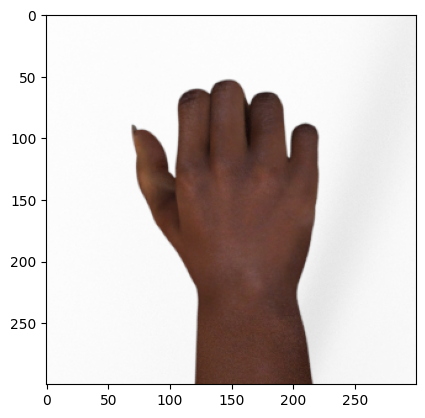

Label: 0
#Examples: 2520
Shape Data: [300 300   3]
Shape Data: []


In [3]:
#Show image
for ex in RPS_data:
    if ex["label"] == 0:
        example = np.array(ex["image"])
        answer = np.array(ex["label"])
        break

plt.imshow(example)
plt.show()
print(f"Label: {answer}")

print(f"#Examples: {len(RPS_data)}")
print(f"Shape Data: {tf.shape(example)}")
print(f"Shape Data: {tf.shape(answer)}")

In [ ]:
# 0: Rock
# 1: Paper
# 2: Scissors

In [4]:
x = []
y = []

for ex in RPS_data:
    x.append(ex["image"])
    y.append(ex["label"])

2024-03-13 13:13:37.276474: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
x,y = np.array(x),np.array(y)

In [6]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([840, 840, 840]))

In [7]:
y = tf.keras.utils.to_categorical(y)

In [8]:
y[0]

array([0., 0., 1.])

In [9]:
x[0].shape

(300, 300, 3)

In [10]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(300,300,3,1)))
model.add(tf.keras.layers.Conv3D(10, kernel_size=(10,10,3), padding="same"))
model.add(tf.keras.layers.AvgPool3D((10,10,1)))
model.add(tf.keras.layers.Conv3D(10, kernel_size=(10,10,3), padding="same"))
model.add(tf.keras.layers.AvgPool3D((10,10,1)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(3, activation="softmax"))

model.compile(metrics=["acc"], loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 300, 300, 3,    │         3,010 │
│                                 │ 10)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling3d               │ (None, 30, 30, 3, 10)  │             0 │
│ (AveragePooling3D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 30, 30, 3, 10)  │        30,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling3d_1             │ (None, 3, 3, 3, 10)    │             0 │
│ (AveragePooling3D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 270)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │        54,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,523 (439.54 KB)

 Trainable params: 112,523 (439.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.count_params()

112523

In [15]:
x.shape

(2520, 300, 300, 3)

In [ ]:
model.save("model.keras")

In [15]:
model.fit(x[0:50],y[0:50],epochs=1)

: 